# Manipulation des images à l'aide de Numpy

Un ordinateur manipule deux grands types d'images : les images constituées de pixels et les images vectorielles. Les premières décomposent l'image en un tableau de très petits points :

![Exemple de pixels](http://upload.wikimedia.org/wikipedia/commons/2/2b/Pixel-example.png)

Une image est le plus souvent un tableau à trois dimensions (hauteur, largeur, canal colorimétrique). Les données sont rangées par lignes mais la notation la plus usuelle en informatique est `data[x,y]` (avec l'abscisse en premier) ; Numpy quant à lui respecte l'usage mathématique et note de préférence `data[y,x]` avec (l'ordonnée en premier). L'origine est le plus souvent située en haut à gauche et Numpy respecte cet usage par défaut. Il y a le plus souvent trois canaux colorimétriques : rouge, vert, bleu ; il peut n'y en avoir qu'un (niveau de gris) mais le gris peut parfaitement être codé dans le premier modèle. On ajoute parfois un quatrième canal (transparence du pixel).
Ces trois valeurs constituent un modèle courant (mais non le seul) permettant de coder la plupart des couleurs ; on parle du [modèle RVB (rouge, vert, bleu)](https://fr.wikipedia.org/wiki/Rouge_vert_bleu) ou plus couramment (d'après l'anglais) du modèle RGB :

![Modèle RGB](https://upload.wikimedia.org/wikipedia/commons/e/e0/Synthese%2B.svg)

#### Images en niveaux de gris

Dans le cas le plus général (tableaux à trois dimensions avec canaux colorimétriques), le gris est obtenu en assignant exactement la même valeur à chacune des trois composantes RGB (red/green/blue).

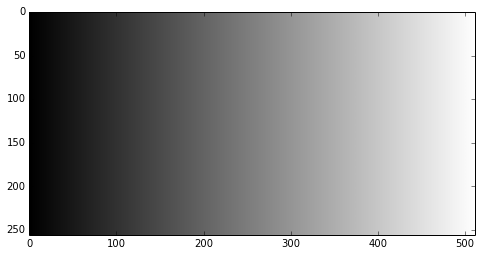

In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

h,w = 256, 512
data = np.zeros( (h, w, 3) )
for y in range(h):
    for x in range(w):
        data[y,x] = [ x/w, x/w, x/w ]

plt.imshow(data)
plt.gcf().set_size_inches(8,8)

Une solution plus élégante pour construire le tableau sera trouvée à l'aide de la méthode `resize` qui permet d'étendre un tableau en recopiant les données existantes. On se contente alors de créer une première ligne puis de redimensionner le tableau.

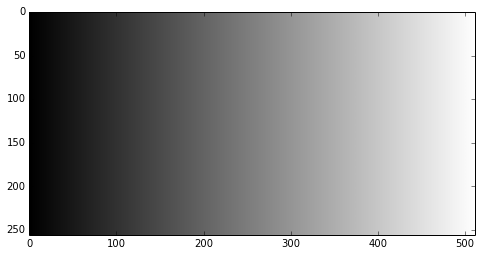

In [39]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

h,w = 256, 512

# on crée d'abord une ligne unique
data = [[x/w, x/w, x/w] for x in range(w)]

# on étend le tableau sur la hauteur souhaitée
data = np.resize(data, (h,w,3))

plt.imshow(data)
plt.gcf().set_size_inches(8,8)

#### Lecture d'une image à partir d'un fichier

On lit une image depuis un fichier (le format PNG est reconnu par défaut sous Matplotlib). Ici l'image est chargée depuis une adresse Internet à l'aide du module `urllib` depuis une page de [tutoriel consacré à Matplotlib](http://matplotlib.org/users/image_tutorial.html).

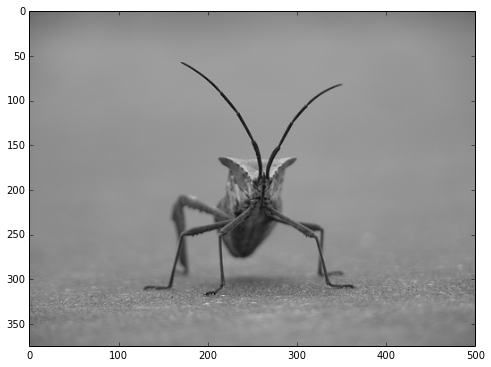

In [1]:
%matplotlib inline

import urllib.request
from matplotlib import pyplot as plt

data = plt.imread( urllib.request.urlopen('http://matplotlib.org/_images/stinkbug.png') )

plt.imshow(data)
plt.gcf().set_size_inches(8,8)

Grâce aux opérations matricielles (plus exactement ci-dessous des multiplications termes à termes), il est extrêmement simple d'agir sur les différents canaux sans recourir à des boucles.

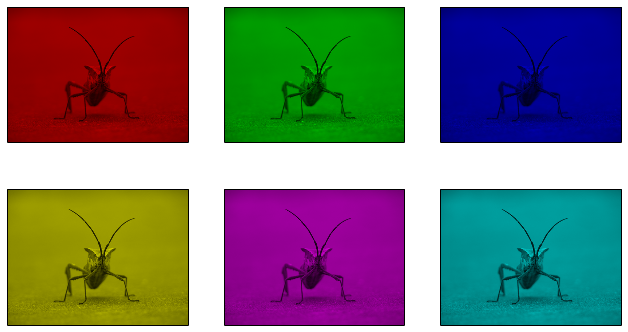

In [83]:
%matplotlib inline

import urllib.request
from matplotlib import pyplot as plt

data = plt.imread( urllib.request.urlopen('http://matplotlib.org/_images/stinkbug.png') )

plt.subplot(2,3,1)
plt.imshow(data*[1,0,0]) # suppression du vert et du bleu
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(2,3,2)
plt.imshow(data*[0,1,0]) # suppression du rouge et du bleu
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(2,3,3)
plt.imshow(data*[0,0,1]) # suppression du rouge et du vert
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(2,3,4)
plt.imshow(data*[1,1,0]) # suppression du bleu
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(2,3,5)
plt.imshow(data*[1,0,1]) # suppression du vert
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(2,3,6)
plt.imshow(data*[0,1,1]) # suppression du rouge
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

plt.gcf().set_size_inches(11,6)

#### Travail sur une image en couleur

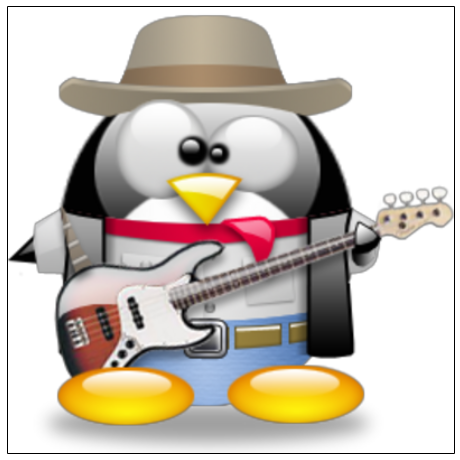

In [74]:
%matplotlib inline

import urllib.request
from matplotlib import pyplot as plt

data = plt.imread( urllib.request.urlopen(
  'http://www.pictonale.net/2009/06/14/024qfhp/mid-overlord59-tux-cowboy-guitar.png') )

plt.imshow(data)
plt.gcf().set_size_inches(8,8)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

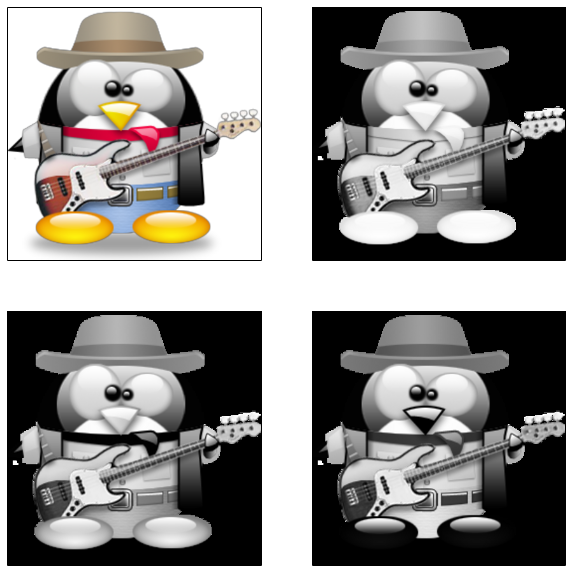

In [3]:
%matplotlib inline

import urllib.request
from matplotlib import pyplot as plt

data = plt.imread( urllib.request.urlopen(
  'http://www.pictonale.net/2009/06/14/024qfhp/mid-overlord59-tux-cowboy-guitar.png') )

h,w,_ = data.shape

data_red = data[:,:,0].reshape(h,w,1).repeat(3,axis=2)
data_green = data[:,:,1].reshape(h,w,1).repeat(3,axis=2)
data_blue = data[:,:,2].reshape(h,w,1).repeat(3,axis=2)

plt.subplot(2,2,1)
plt.imshow(data)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(2,2,2)
plt.imshow(data_red)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(2,2,3)
plt.imshow(data_green)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(2,2,4)
plt.imshow(data_blue)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

plt.gcf().set_size_inches(10,10)

Dans l'exemple ci-dessus, analyser :

  * la couleur des pieds et du bec ;
  * la couleur du ruban ;
  * la couleur du pantalon.

Numpy supporte un système d'affectation complexe qui permet par exemple ici d'échanger aisément deux canaux colorimétriques.

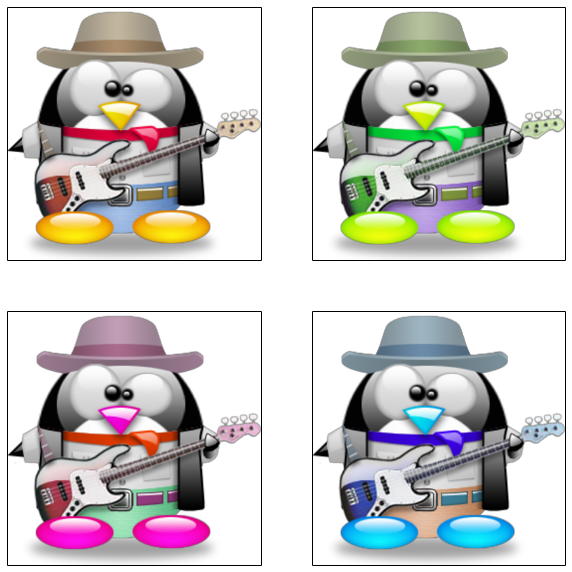

In [4]:
data_swap_rg = np.array(data)
data_swap_rg[:,:,[0,1]] = data_swap_rg[:,:,[1,0]]

data_swap_gb = np.array(data)
data_swap_gb[:,:,[1,2]] = data_swap_gb[:,:,[2,1]]

data_swap_rb = np.array(data)
data_swap_rb[:,:,[0,2]] = data_swap_rb[:,:,[2,0]]

plt.subplot(2,2,1)
plt.imshow(data)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(2,2,2)
plt.imshow(data_swap_rg)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(2,2,3)
plt.imshow(data_swap_gb)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(2,2,4)
plt.imshow(data_swap_rb)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

plt.gcf().set_size_inches(10,10)


#### Construction d'une figure

On essaie de tracer (de façon sommaire) l'[ensemble de Mandelbrot](http://fr.wikipedia.org/wiki/Ensemble_de_Mandelbrot).

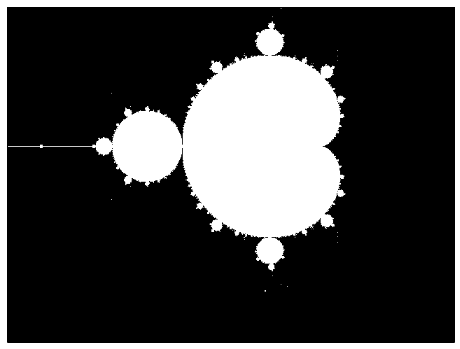

In [14]:
data = np.zeros( (480, 640, 3) )

def mandelbrot(x,y):
    c = ( x + y*1j ) / 200.0 - (2+1j)
    z = 0
    for _ in range(250):
        z = z*z + c
    return abs(z) < 2

for y in range(480):
    for x in range(640):
        data[y,x,:] = (1,1,1) if mandelbrot(x,y) else (0,0,0)

plt.imshow(data)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

plt.gcf().set_size_inches(8,8)
